### EDA анализ.
Источник: [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv)

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
%matplotlib inline

In [93]:
# Читаем наш датасэт из csv файла.
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Статистика.

In [94]:
# Смотрим на кол-во строк и столбцов.
data.shape

(1599, 12)

In [95]:
# Чистим данные от дублированных записей.
data = data.drop_duplicates()
data.shape

(1359, 12)

Изначально у нас было 1599 строк, после удаления дублей осталось 1359. Значит на весь датасэт их было 240 шт.

In [96]:
# Столбец 'quality' - это параметр, который нужно предсказать, удалим егo, он нам не нужен.
data = data.drop(columns='quality')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [97]:
# Смотрим на пропуски данных в датасэте.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
dtypes: float64(11)
memory usage: 127.4 KB


In [98]:
# Смотрим на пропуски данных в датасэте.
data.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64

Пропусков нет, нам повезло.

In [99]:
# Выведем статистику по каждому столбцу.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### Поиск зависимостей. Графики.

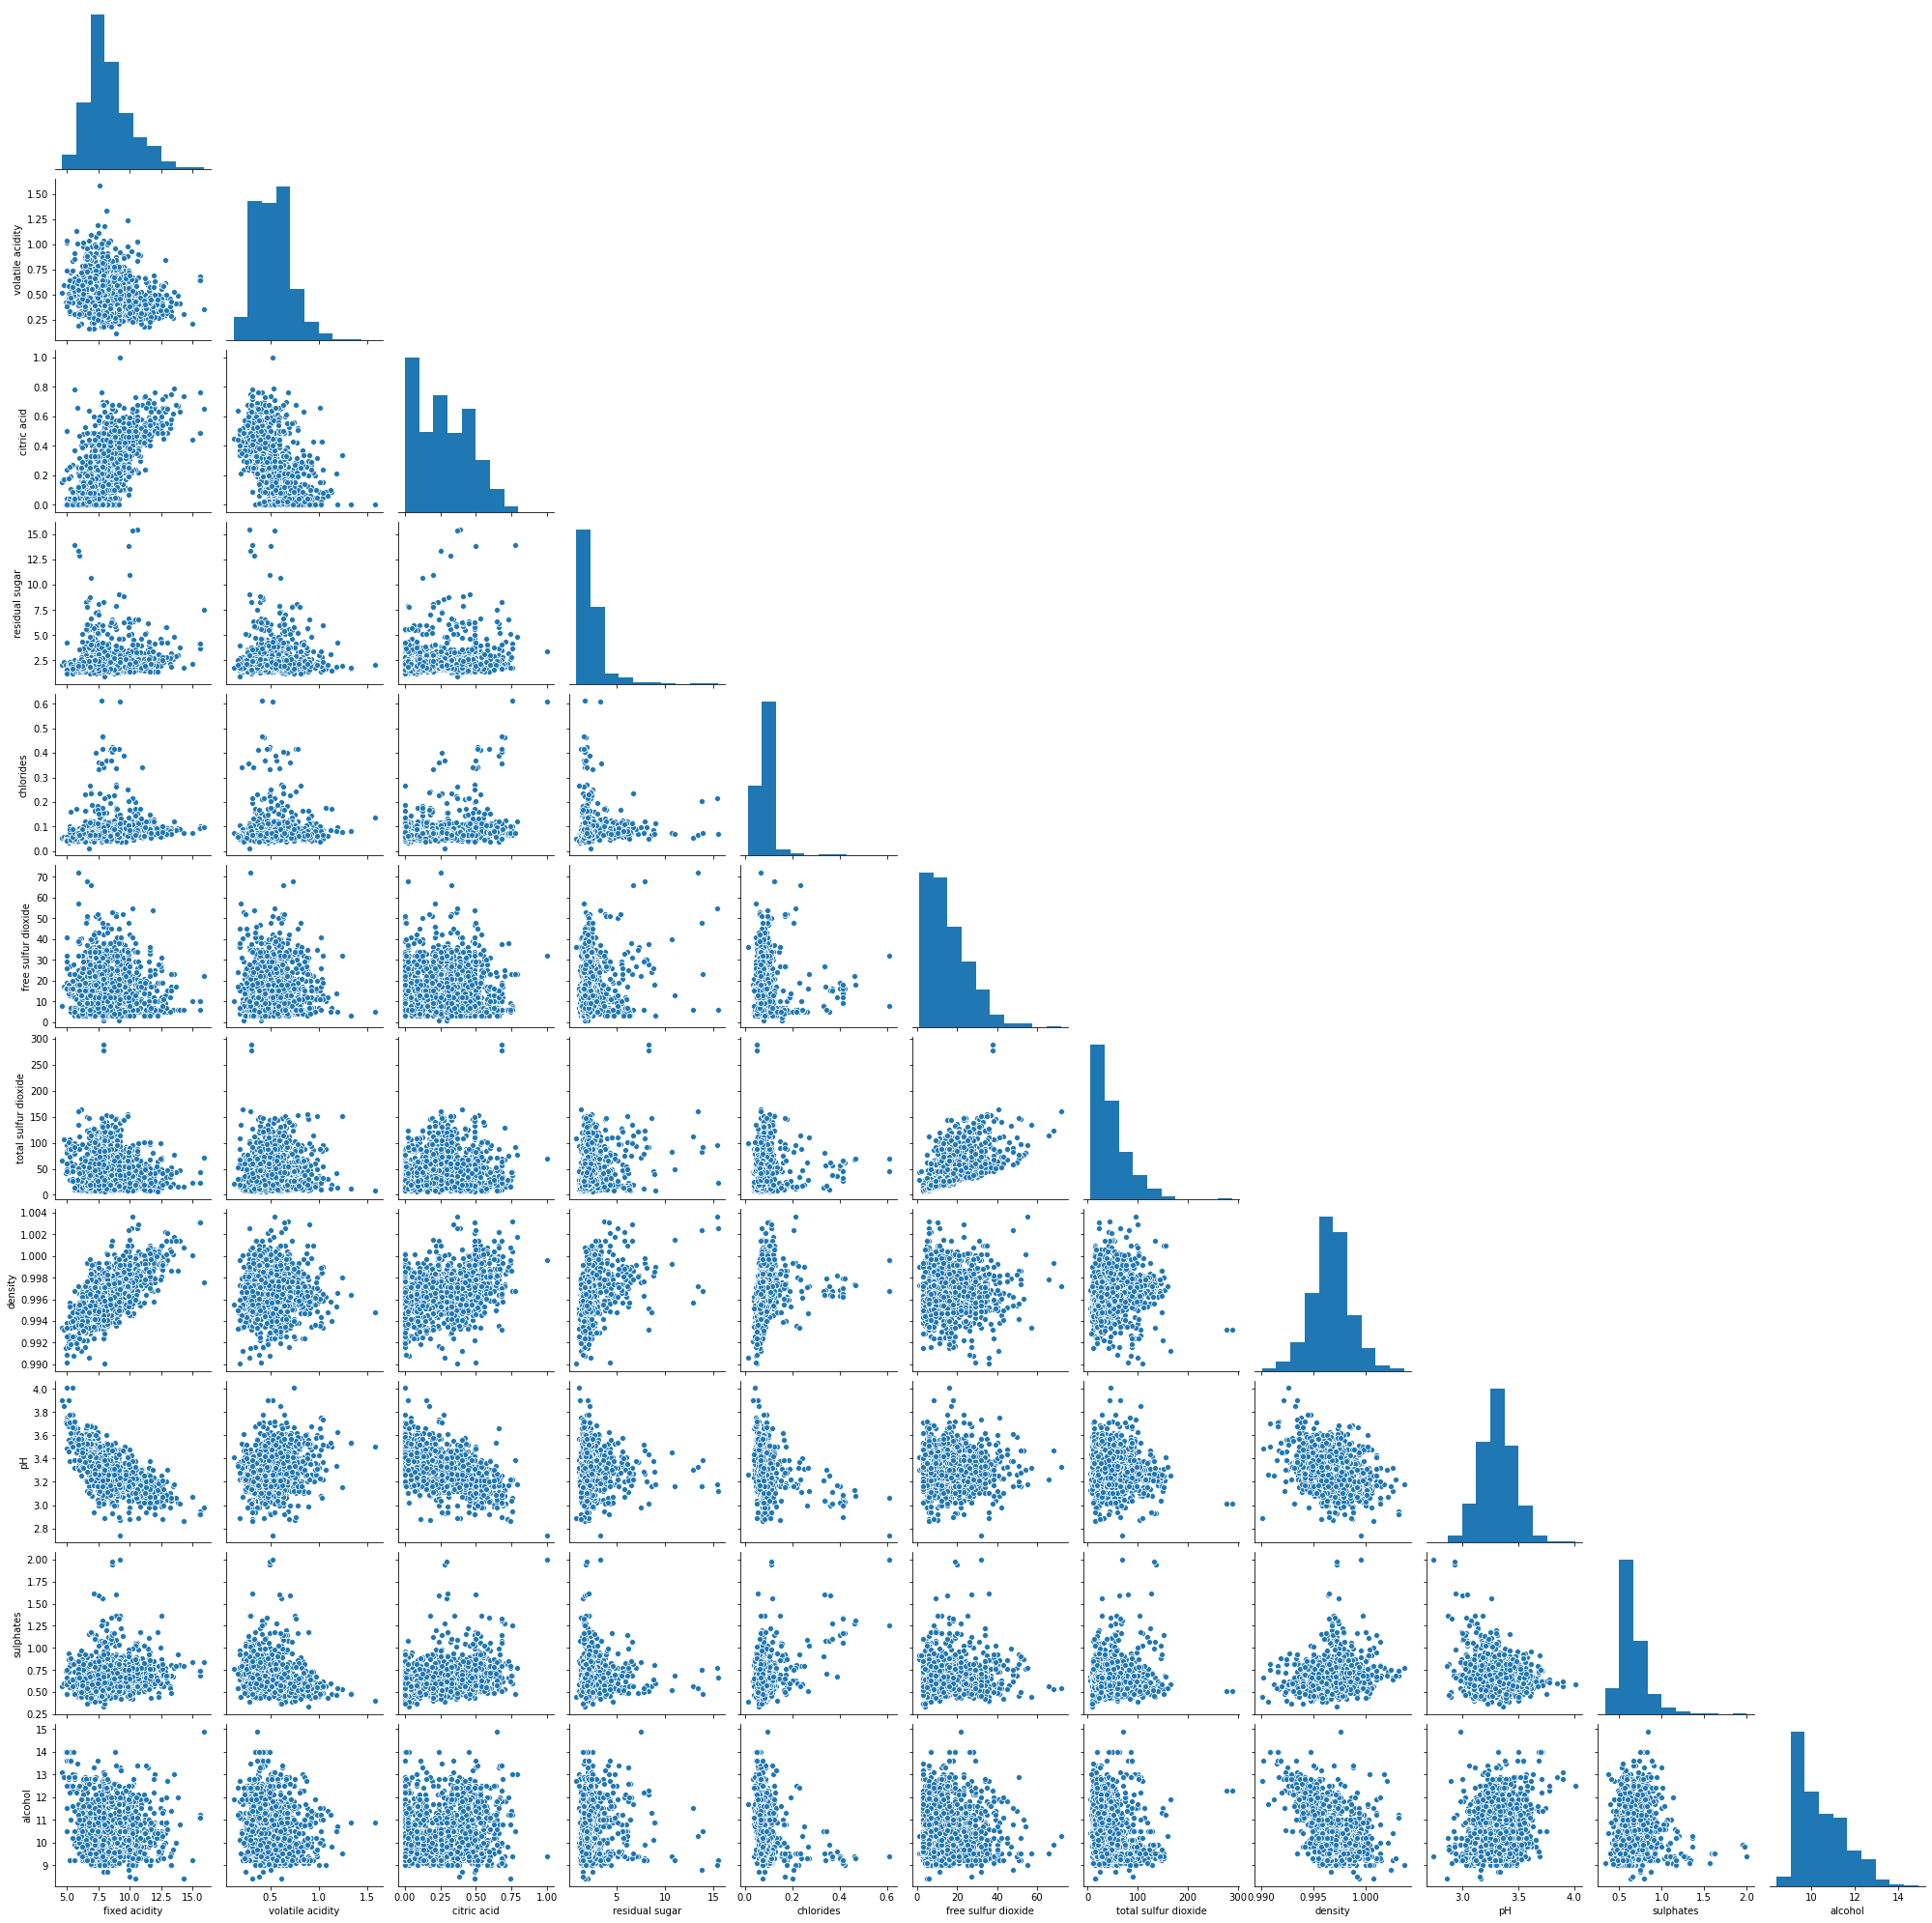

In [100]:
# Построим попарные графики и оценим визуально зависимости между значениями по колонкам.
# Видим, что наблюдается некая корреляция между:
#    fixed acidity и citric acid,
#   density и fixed acidity,
#    pH и fixed acidity,
#    total sulfur dioxide и free sulfur dioxide.
sns.pairplot(data=data, corner=True)

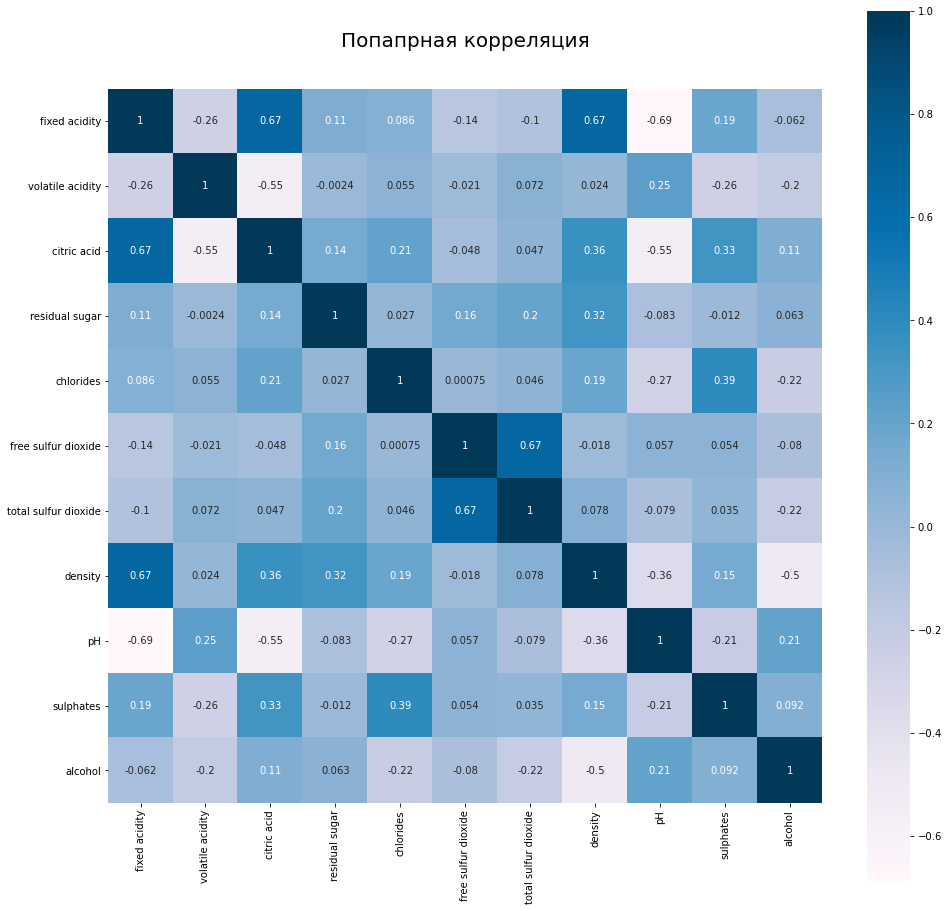

In [101]:
# Построим матрицу попарных корреляций.
plt.figure(figsize=(16, 16))
plt.title('Попапрная корреляция', y=1.05, size=20)
sns.heatmap(data.corr(), square=True, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [102]:
# Видим, что ни одна пара не коррелирует между собой с коэф-ом выше, чем 0.75.
data_corr = data.corr().unstack().reset_index()
high_corr = data_corr[(np.abs(data_corr[0]) > 0.75) & (data_corr['level_0'] != data_corr['level_1'])].values
high_corr

array([], shape=(0, 3), dtype=object)

Интересный момент, fixid acidity (титруемая кислотность) и pH (водородный показатель) в виноделии неразрывно связаны. Чем выше кислотность, тем ниже pH. По идее эти показатели должны коррелировать между собой с высоким по модулю коэффициентом.

### Проверка нормальности распределений.

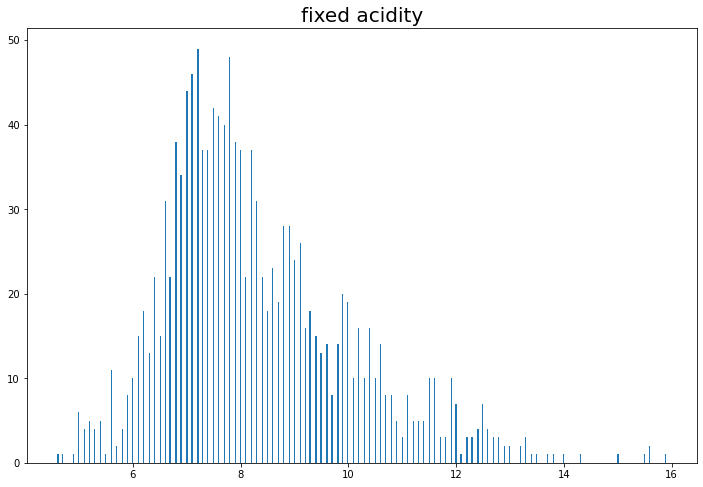

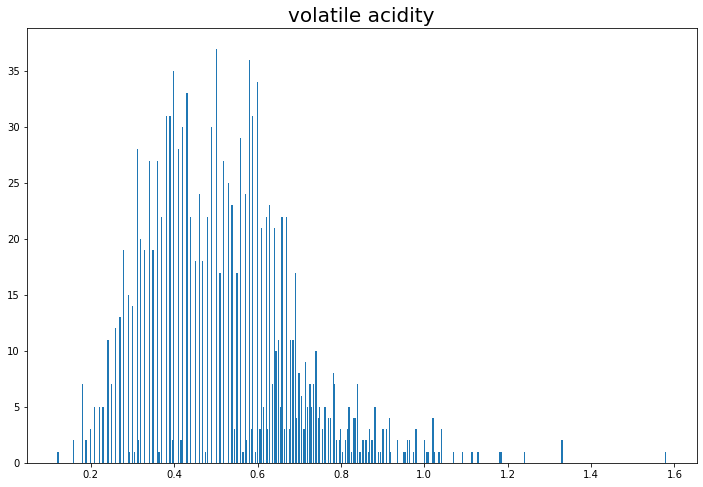

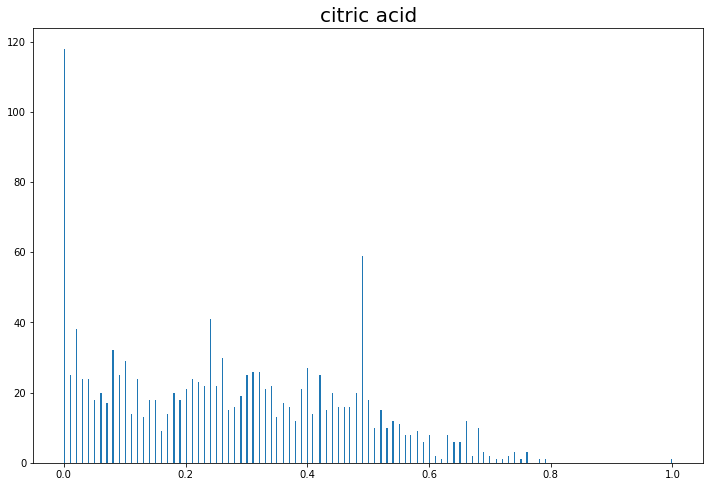

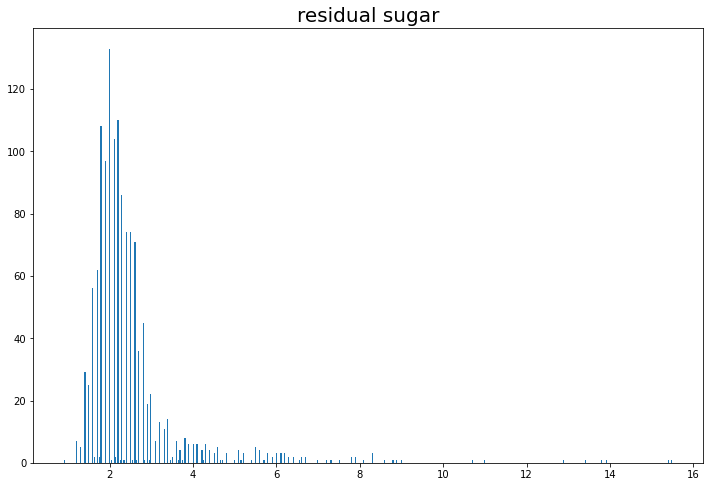

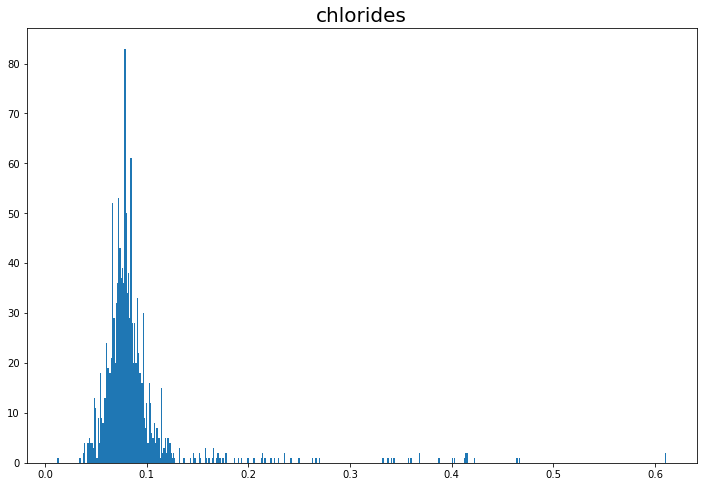

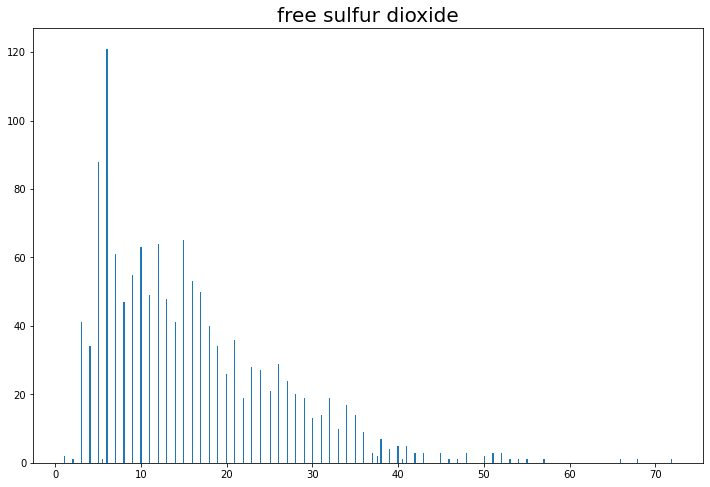

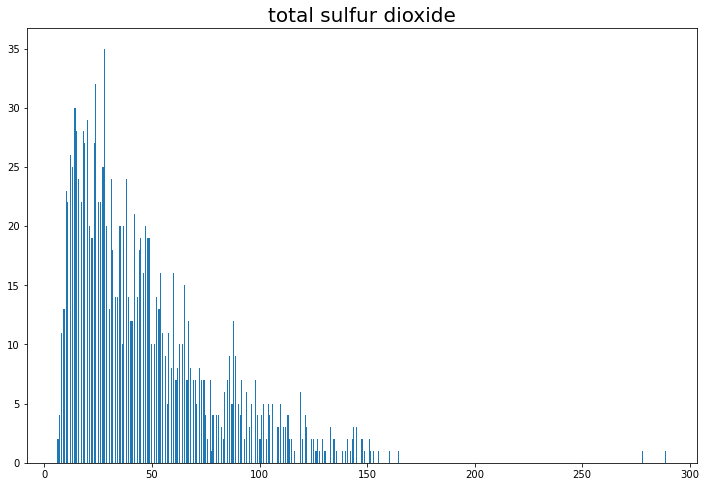

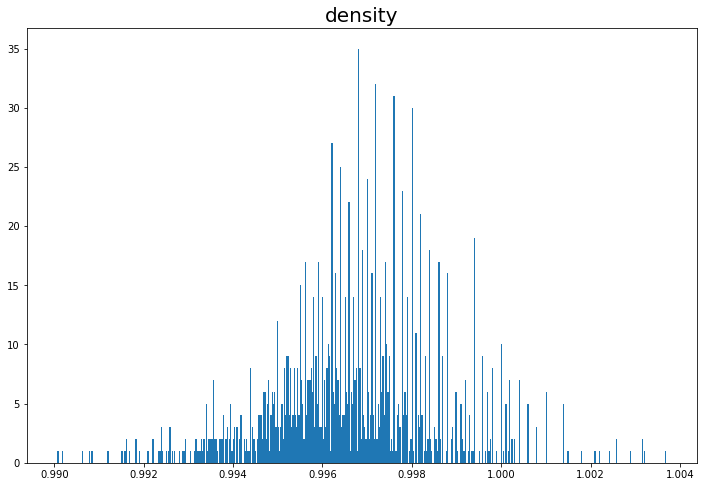

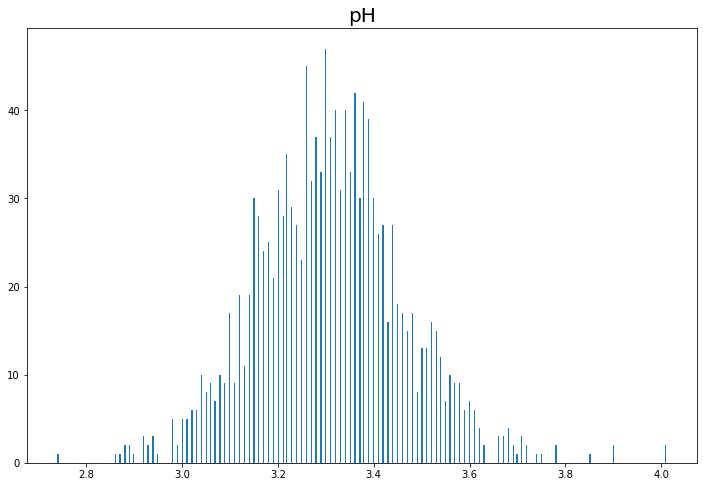

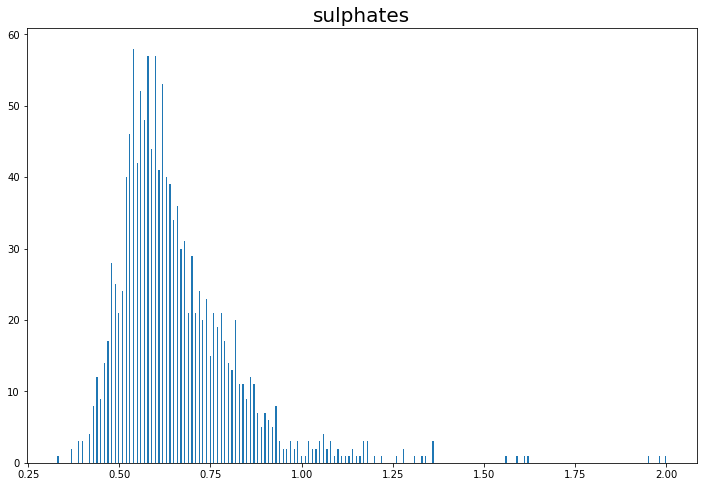

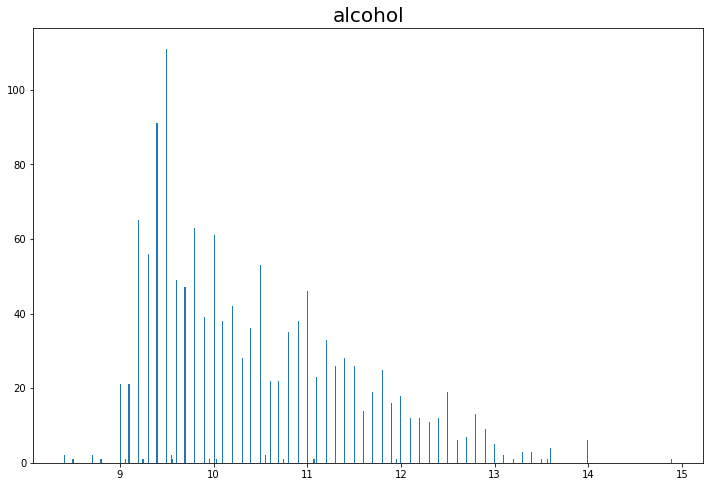

In [103]:
# Из гистограмм видно, что только density и pH имеют вид, близкий к нормальному распределению.
for itm in data:
    plt.figure(figsize=(12, 8))
    plt.title(itm, size=20)
    _ = plt.hist(x=data[itm], bins=500)
    plt.show()

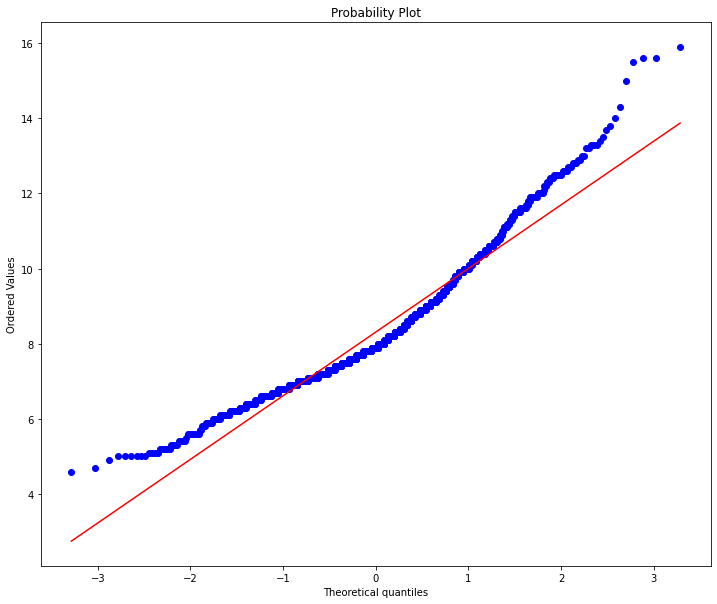

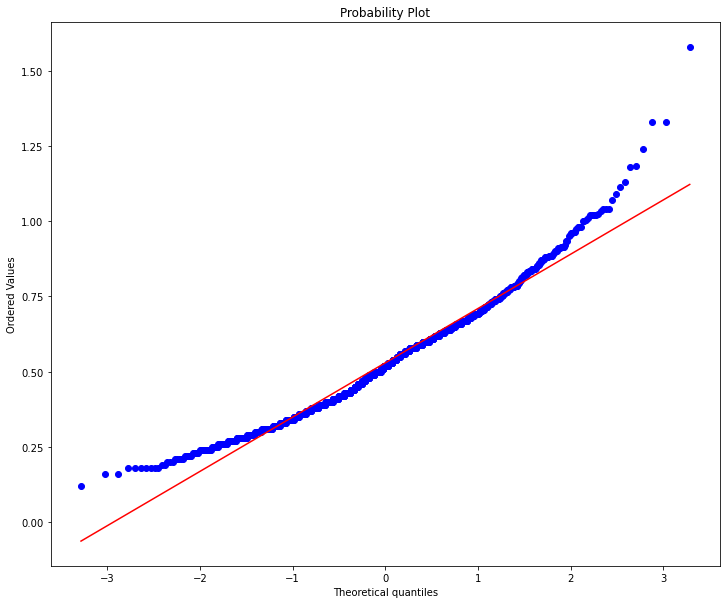

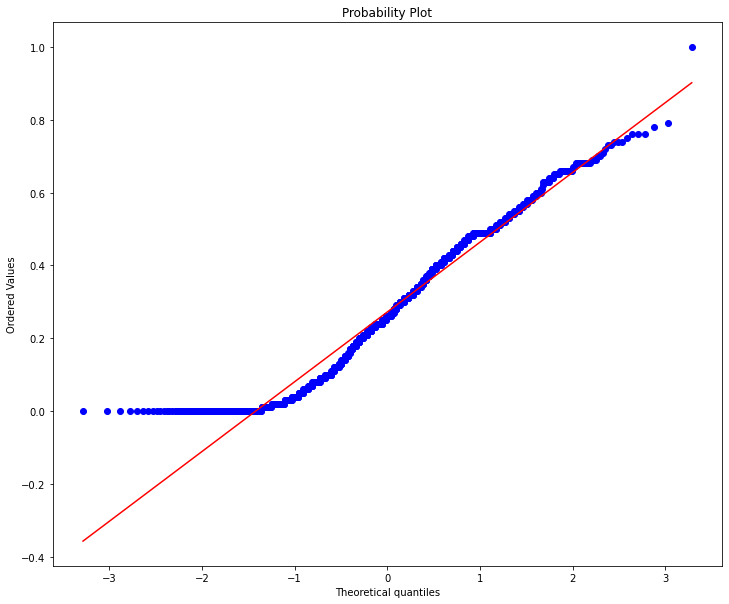

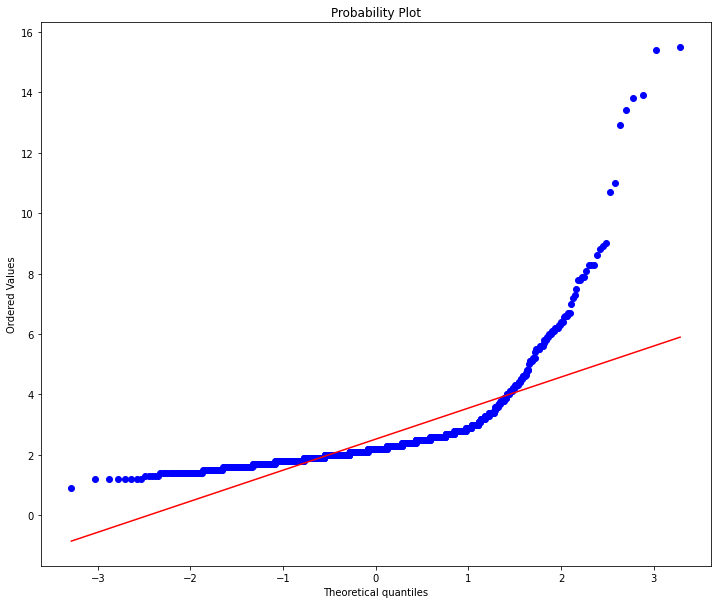

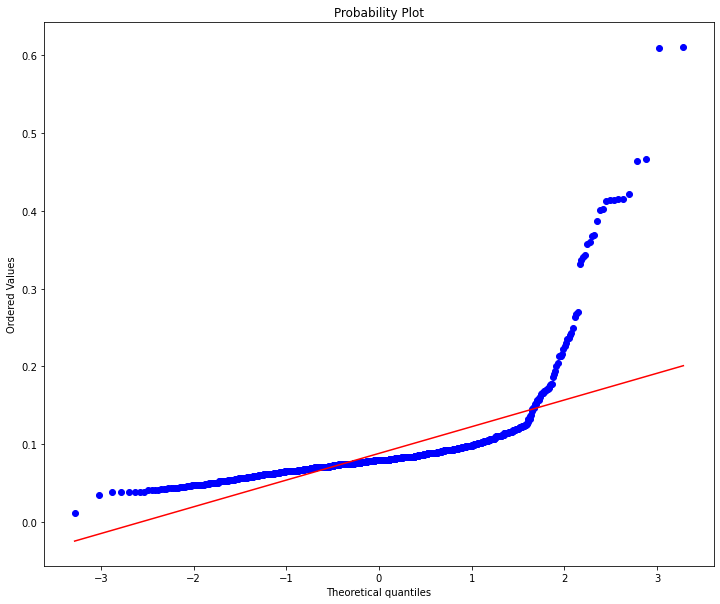

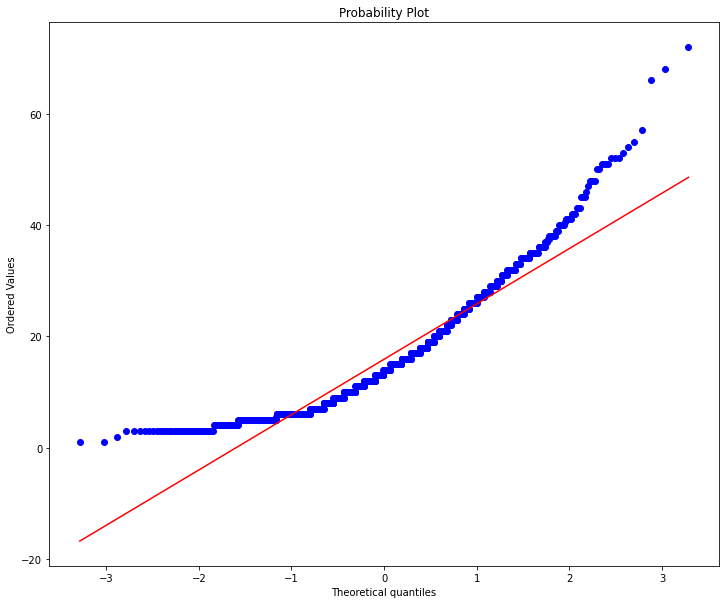

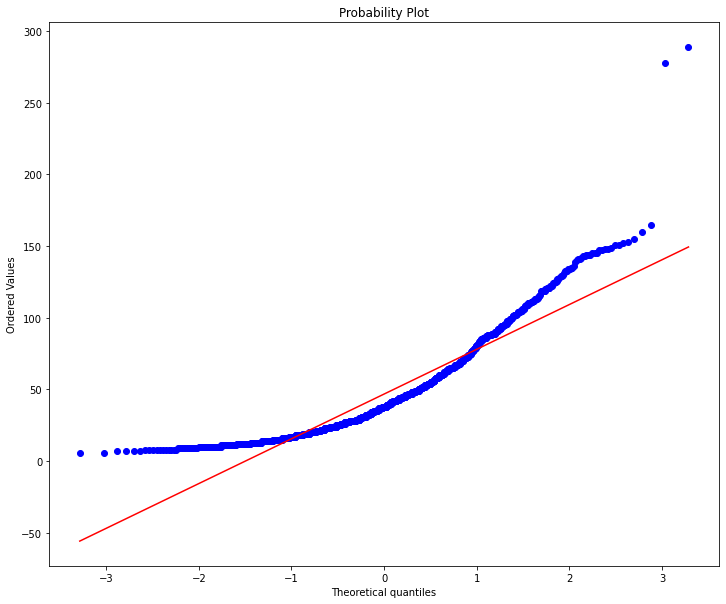

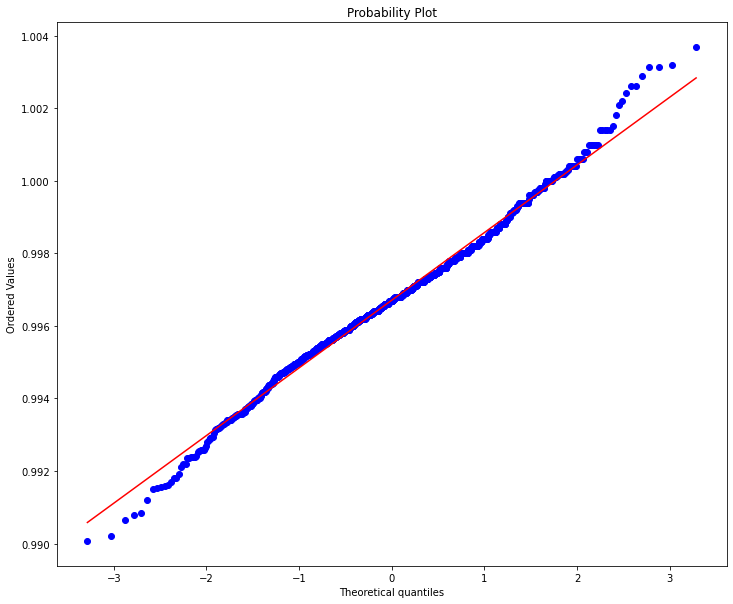

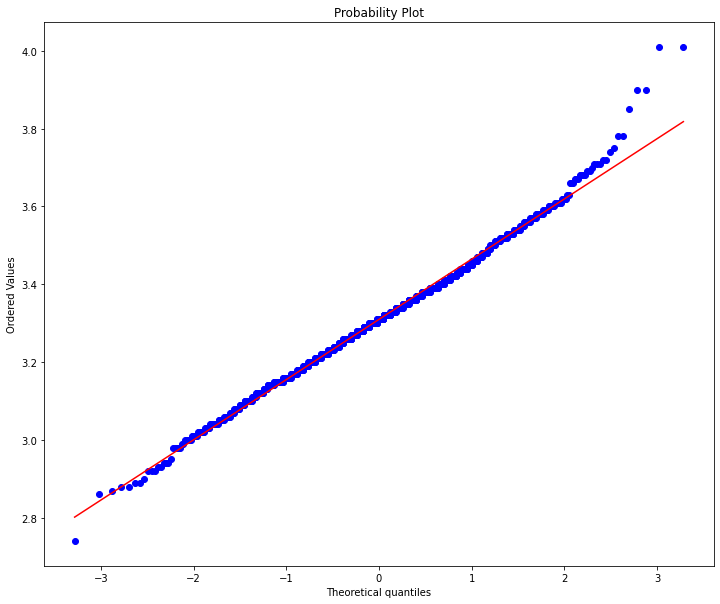

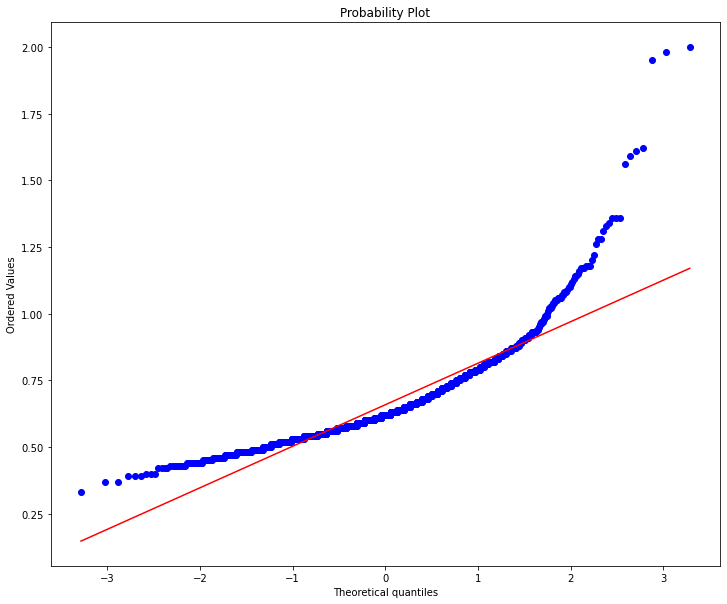

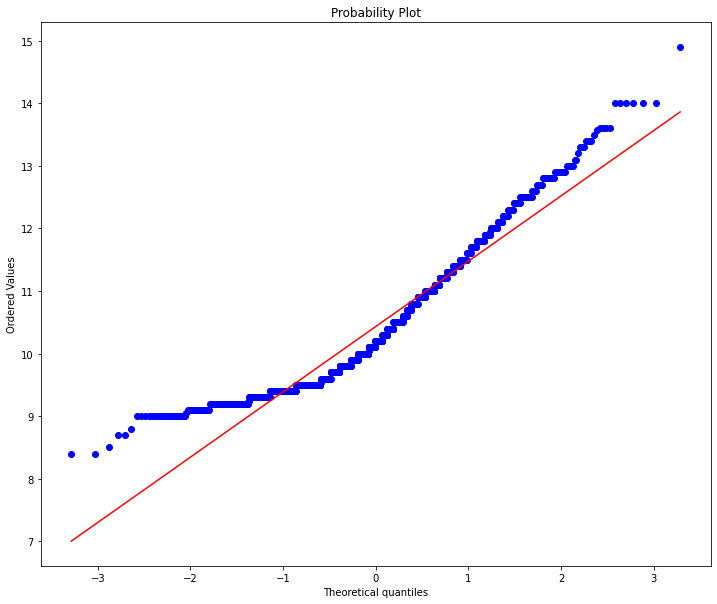

In [104]:
# QQ графики подтверждают, что только density и pH имеют вид, близкий к нормальному распределению.
for itm in data:
    plt.figure(figsize=(12, 10))
    plt.title(itm, size=20)
    stats.probplot(data[itm], dist='norm', plot=pylab)
    pylab.show()

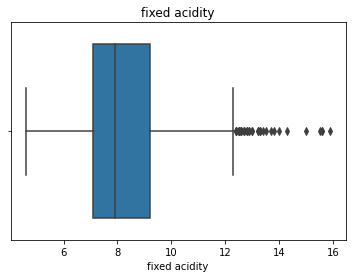

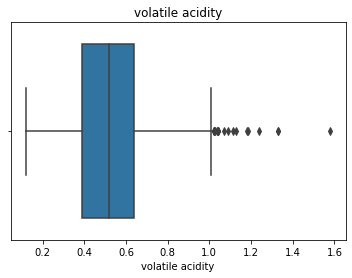

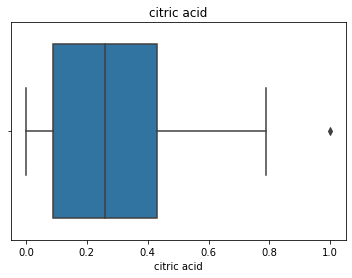

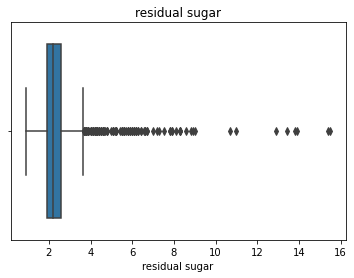

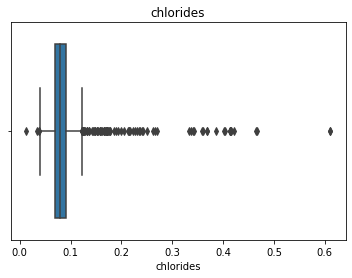

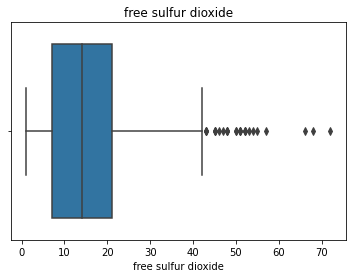

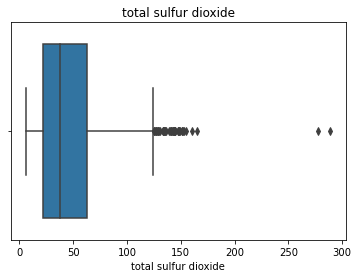

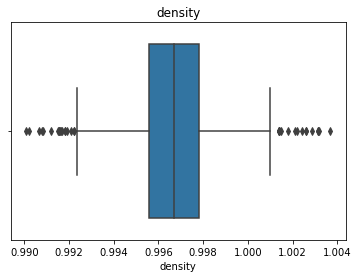

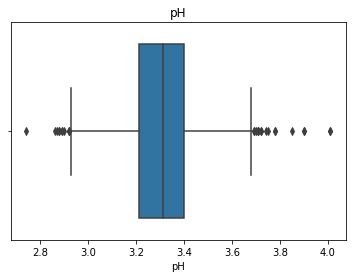

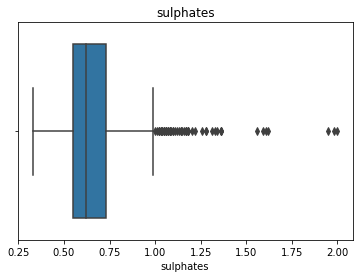

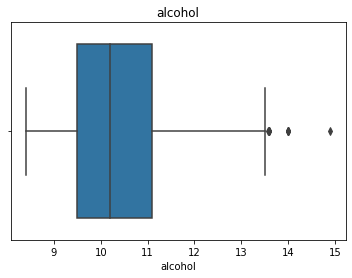

In [105]:
for itm in data:
    plt.title(itm)
    sns.boxplot(data[itm])
    plt.show()

По боксплотам можно сказать, что в целом, несмотря на значения, выбивающиеся за пределы усов, все показатели в норме. Но есть исключения. В боксполте pH видно, что есть вино с pH ниже, чем 2.8, скорее всего оно скисло. В боксполте total sulfur dioxide (всего диоксдиа серы) видно, что есть вина с показателем выше 250. На российский рынок они бы не были допущены, т.к. по нашим нормам предельное значение 250, но на американском рынке верхний порог 300, поэтому не стоит считать эти позиции выбросами. По показателю residual sugar (остаточные сахара) видно, что основная масса вина - сухие сорта. По показателю alcohol (алкоголь или крепость) видно, что в общей массе вина есть несколько портвейнов (крепленых вин).